# Fully Connected vs. Convolutional Neural Networks

## Refs 

https://www.tensorflow.org/install

https://www.tensorflow.org/tutorials/keras/classification
    

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def show_images(rows, cols, data, labels):

    width= 3 * rows
    height= 3 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = data[a]
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :, 0], cmap='gray')
    fig.tight_layout()    
    plt.show()


In [13]:
mnist = tf.keras.datasets.mnist

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test / 255.0
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [15]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


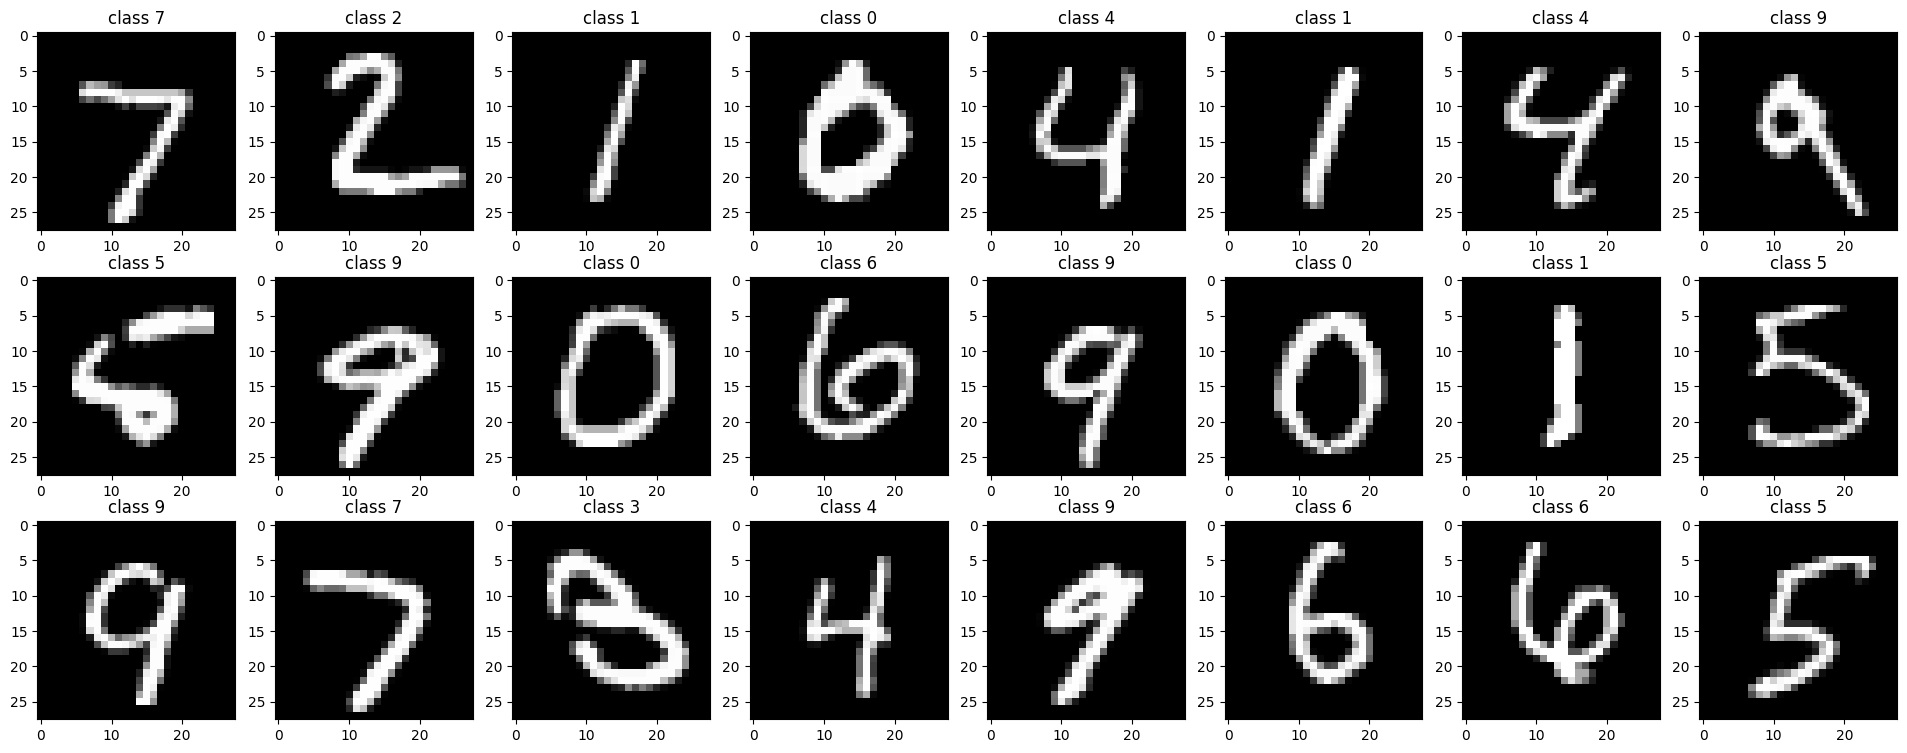

<Figure size 640x480 with 0 Axes>

In [16]:
show_images(3,8, x_test,y_test)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [18]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [19]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 2.3140 - accuracy: 0.1124 - 269ms/epoch - 858us/step


[2.314007043838501, 0.11240000277757645]

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2189 - accuracy: 0.9346 - val_loss: 0.1182 - val_accuracy: 0.9637
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9727 - val_loss: 0.1135 - val_accuracy: 0.9672
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0606 - accuracy: 0.9803 - val_loss: 0.0940 - val_accuracy: 0.9738
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0928 - val_accuracy: 0.9731
Epoch 5/20
  62/1500 [>.............................] - ETA: 2s - loss: 0.0294 - accuracy: 0.9904

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

In [ ]:
show_history(history)

In [ ]:
best_epoch = np.argmax(history.history['val_accuracy'])
print(best_epoch)

In [ ]:
file_path = 'best_modelS'
checkpointerS = ModelCheckpoint(filepath=file_path,
                               monitor='val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)

earlyStopperS = EarlyStopping(monitor='val_accuracy',
                             min_delta=0.00001,
                             patience=9,
                             verbose=1)

tbCallBackS = TensorBoard(log_dir='logS',
                         histogram_freq=0,
                         write_graph=True,
                         write_images=True)

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model2.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[checkpointerS, earlyStopperS, tbCallBackS])

In [ ]:
model2.evaluate(x_test, y_test, verbose=2)

In [ ]:
model2.load_weights(file_path)

In [ ]:
model2.evaluate(x_test, y_test, verbose=2)

In [ ]:
model2.summary()

In [ ]:
modelConv = tf.keras.Sequential()
modelConv.add(tf.keras.layers.Input(shape=(28,28,1)))
modelConv.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu'))
modelConv.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu'))
modelConv.add(tf.keras.layers.Flatten()) #dá-nos um vetor
modelConv.add(tf.keras.layers.Dense(32, activation='relu'))
modelConv.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
modelConv.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [ ]:
modelConv.summary()

In [ ]:
file_path = 'best_modelC'
checkpointerC = ModelCheckpoint(filepath=file_path,
                               monitor='val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)

earlyStopperC = EarlyStopping(monitor='val_accuracy',
                             min_delta=0.00001,
                             patience=8,
                             verbose=1)

tbCallBackC = TensorBoard(log_dir='logC',
                         histogram_freq=0,
                         write_graph=True,
                         write_images=True)

In [ ]:
history=modelConv.fit(x_train,y_train,batch_size=32,
                     epochs=100,
                     callbacks=[checkpointerC,earlyStopperC,tbCallBackC],
                     validation_split=0.2)